In [ ]:
#!pip install --upgrade ipywidgets
#!pip install widgetsnbextension
#!conda install transformers -y
#!conda install pytorch -y
#!conda install tensorflow -y
#!pip install tokenizers
#!conda install nltk -y
#nltk.download()
#!conda install -c huggingface transformers --upgrade
#!pip install transformers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [4]:
df=pd.read_csv('tripadvisor_hotel_reviews.csv',low_memory=False)
df.shape
df=df.reset_index()
df.shape



(20491, 3)

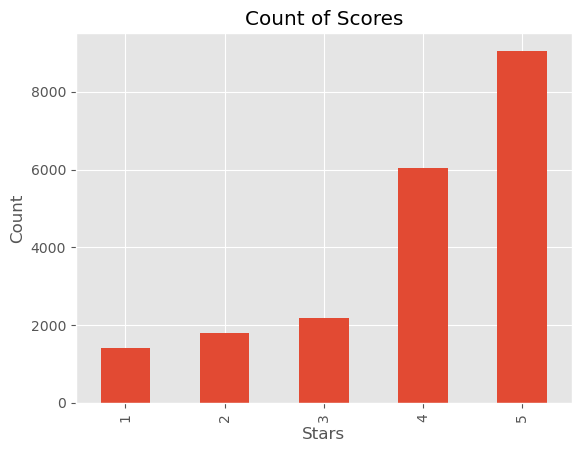

In [3]:
df['Rating'].value_counts().sort_index() \
    .plot(
        kind='bar',
        xlabel='Stars',
        ylabel='Count',
        title='Count of Scores'
    )
plt.show()

In [4]:
test = df['Review'][467]
test

'comfortable pleasant stay stayed hotel nights attend conference, room comfortable hotel layout conference space convenient, ate times hotel breakfast late dinner lobby bar meals fine, pleasant hotel stay recommend friends,  '

In [6]:
tokens = nltk.word_tokenize(test)
tokens

['comfortable',
 'pleasant',
 'stay',
 'stayed',
 'hotel',
 'nights',
 'attend',
 'conference',
 ',',
 'room',
 'comfortable',
 'hotel',
 'layout',
 'conference',
 'space',
 'convenient',
 ',',
 'ate',
 'times',
 'hotel',
 'breakfast',
 'late',
 'dinner',
 'lobby',
 'bar',
 'meals',
 'fine',
 ',',
 'pleasant',
 'hotel',
 'stay',
 'recommend',
 'friends',
 ',']

In [7]:
tagged = nltk.pos_tag(tokens)
tagged

[('comfortable', 'JJ'),
 ('pleasant', 'JJ'),
 ('stay', 'NN'),
 ('stayed', 'VBD'),
 ('hotel', 'NN'),
 ('nights', 'NNS'),
 ('attend', 'VBP'),
 ('conference', 'NN'),
 (',', ','),
 ('room', 'NN'),
 ('comfortable', 'JJ'),
 ('hotel', 'NN'),
 ('layout', 'NN'),
 ('conference', 'NN'),
 ('space', 'NN'),
 ('convenient', 'NN'),
 (',', ','),
 ('ate', 'JJ'),
 ('times', 'NNS'),
 ('hotel', 'VBP'),
 ('breakfast', 'NN'),
 ('late', 'JJ'),
 ('dinner', 'NN'),
 ('lobby', 'NN'),
 ('bar', 'NN'),
 ('meals', 'NNS'),
 ('fine', 'VBP'),
 (',', ','),
 ('pleasant', 'JJ'),
 ('hotel', 'NN'),
 ('stay', 'NN'),
 ('recommend', 'VB'),
 ('friends', 'NNS'),
 (',', ',')]

In [8]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  comfortable/JJ
  pleasant/JJ
  stay/NN
  stayed/VBD
  hotel/NN
  nights/NNS
  attend/VBP
  conference/NN
  ,/,
  room/NN
  comfortable/JJ
  hotel/NN
  layout/NN
  conference/NN
  space/NN
  convenient/NN
  ,/,
  ate/JJ
  times/NNS
  hotel/VBP
  breakfast/NN
  late/JJ
  dinner/NN
  lobby/NN
  bar/NN
  meals/NNS
  fine/VBP
  ,/,
  pleasant/JJ
  hotel/NN
  stay/NN
  recommend/VB
  friends/NNS
  ,/,)


In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sent_intensity = SentimentIntensityAnalyzer()

In [10]:
sent_intensity.polarity_scores('I try to do my best at all times')

{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.6369}

In [11]:
sent_intensity.polarity_scores(test)

{'neg': 0.0, 'neu': 0.503, 'pos': 0.497, 'compound': 0.9623}

In [12]:
results = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    myid = i
    results[myid] = sent_intensity.polarity_scores(text)

  0%|          | 0/20491 [00:00<?, ?it/s]

In [13]:
my_res=pd.DataFrame(results).T.reset_index()
my_res=my_res.merge(df, how='right')
my_res.head()


,index,neg,neu,pos,compound,Review,Rating
0,0,0.072,0.643,0.285,0.9747,nice hotel expensive parking got good deal sta...,4
1,1,0.110,0.701,0.189,0.9787,ok nothing special charge diamond member hilto...,2
2,2,0.081,0.700,0.219,0.9889,nice rooms not 4* experience hotel monaco seat...,3
3,3,0.060,0.555,0.385,0.9912,"unique, great stay, wonderful time hotel monac...",5
4,4,0.135,0.643,0.221,0.9797,"great stay great stay, went seahawk game aweso...",5


In [ ]:
ax = sns.barplot(data=my_res, x='Rating', y='compound')
ax.set_title('Compund Score by Star Review')
plt.show()

In [ ]:
mask=my_res['compound']==my_res['compound'].min()
my_res[mask]['Review']

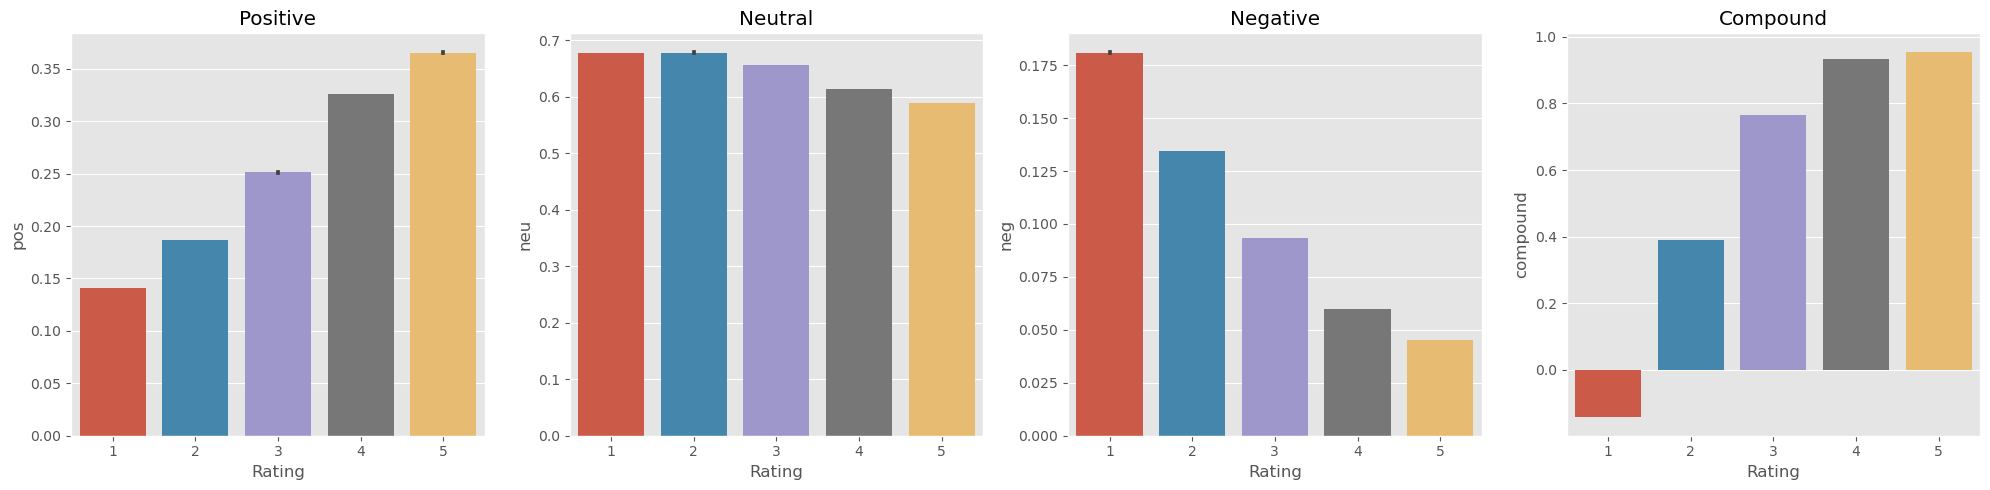

In [14]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
sns.barplot(data=my_res, x='Rating', y='pos', ax=axs[0],errorbar=('ci',0.9))
sns.barplot(data=my_res, x='Rating', y='neu', ax=axs[1],errorbar=('ci',0.9))
sns.barplot(data=my_res, x='Rating', y='neg', ax=axs[2],errorbar=('ci',0.9))
sns.barplot(data=my_res, x='Rating', y='compound', ax=axs[3],errorbar=('ci',0.9))

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
axs[3].set_title('Compound')
plt.tight_layout()
plt.show()

In [16]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax   

In [17]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [18]:
print(test)
sent_intensity.polarity_scores(test)

comfortable pleasant stay stayed hotel nights attend conference, room comfortable hotel layout conference space convenient, ate times hotel breakfast late dinner lobby bar meals fine, pleasant hotel stay recommend friends,  


{'neg': 0.0, 'neu': 0.503, 'pos': 0.497, 'compound': 0.9623}

In [19]:
encoded_text = tokenizer.encode(
                                    test,
                                    return_tensors='pt',
                                    add_special_tokens=True
                                    )
encoded_text
output=model(encoded_text)
output
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.003350225, 'roberta_neu': 0.04198167, 'roberta_pos': 0.95466805}


In [20]:
def polarity_scores_roberta(sentence):
    encoded_text = tokenizer.encode(
                                sentence, 
                                return_tensors='pt',
                                add_special_tokens=True
                            )
    
    output = model(encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
                }
    return scores_dict

In [21]:
polarity_scores_roberta(test)

{'roberta_neg': 0.003350225,
 'roberta_neu': 0.04198167,
 'roberta_pos': 0.95466805}

In [22]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Review']
        myid = i
        roberta_result = polarity_scores_roberta(text)
        #both = {**vader_result_rename, **roberta_result}
        res[myid] = roberta_result
    except RuntimeError:
        print(f'Broke for id {myid}')


  0%|          | 0/20491 [00:00<?, ?it/s]

Broke for id 344
Broke for id 442
Broke for id 487
Broke for id 1284
Broke for id 1328
Broke for id 1343
Broke for id 1421
Broke for id 1452
Broke for id 1488
Broke for id 1490
Broke for id 1797
Broke for id 1985
Broke for id 2033
Broke for id 2043
Broke for id 2280
Broke for id 2292
Broke for id 2322
Broke for id 2421
Broke for id 2493
Broke for id 2494
Broke for id 2541
Broke for id 2563


IndexError: index out of range in self